In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_excel('OutputScriptMarie_KovatsMatchOnly70.xlsx.xlsx', sheetname ='to use for NDMS')

In [3]:
#NORMALIZATION DATA BY SUM
for i in range(0, data.shape[0]):
    data.iloc[i, 2:] = data.iloc[i,2:] / sum(data.iloc[i,2:])

In [4]:
#SUBSET DATA BY SPECIES FOR PLOT MEAN ABUNDANCE CHEMICAL
data_Obt = data.iloc[0:39, :]
data_Dil = data.iloc[53:70, :]
data_Stri = data.iloc[88:105, :]
data_Cil = data.iloc[105:111, :] 
data_Hur = data.iloc[78:88, :]

In [5]:
print ('The sample size of each group is', data_Obt.shape,  data_Dil.shape,  data_Stri.shape,  data_Cil.shape,  data_Hur.shape)

The sample size of each group is (39, 56) (17, 56) (17, 56) (6, 56) (10, 56)


In [6]:
#RANDOM SUBSET OBT, DIL and STRI SO N~10 per species
subset_Obt = np.random.choice(range(0, data_Obt.shape[0]), 10)
subset_Dil = np.random.choice(range(0, data_Dil.shape[0]), 10)
subset_Stri = np.random.choice(range(0, data_Stri.shape[0]), 10)

data_Obt = data_Obt.iloc[subset_Obt, :]
data_Stri = data_Stri.iloc[subset_Stri, :]
data_Dil = data_Dil.iloc[subset_Dil, :]

In [7]:
Cil = np.repeat(1, data_Cil.shape[0])
Dil = np.repeat(2, data_Dil.shape[0])
Str = np.repeat(3, data_Stri.shape[0])
Obt = np.repeat(0, data_Obt.shape[0])
Hur = np.repeat(4, data_Hur.shape[0])
Species = np.concatenate((Obt, Dil, Str, Cil, Hur))

dataAll = np.vstack((data_Obt, data_Dil, data_Stri, data_Cil, data_Hur))

from sklearn.decomposition import PCA
pcaExp = PCA()
pcaExp.fit(dataAll[:, 2:])
print (pcaExp.components_.shape[0],'components come out of this decomposition')


46 components come out of this decomposition


10 components are required to explain 90% of the variance in the data


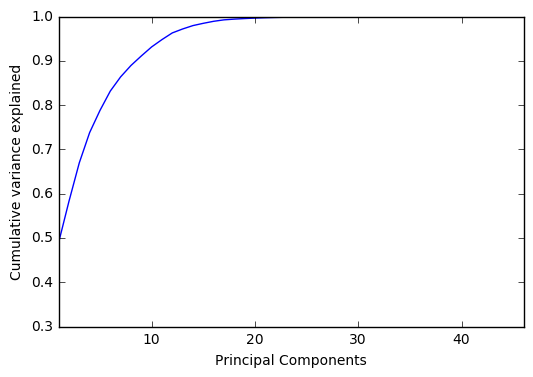

In [8]:
plt.plot(np.cumsum(pcaExp.explained_variance_ratio_))
plt.ylabel('Cumulative variance explained')
plt.xlabel('Principal Components')
plt.xlim(1,pcaExp.components_.shape[0])


CumSumExp = np.cumsum(pcaExp.explained_variance_ratio_)
for i in range(0, len(CumSumExp)):
    if CumSumExp[i] >= 0.9:
        print (i+1, 'components are required to explain 90% of the variance in the data')
        break
        


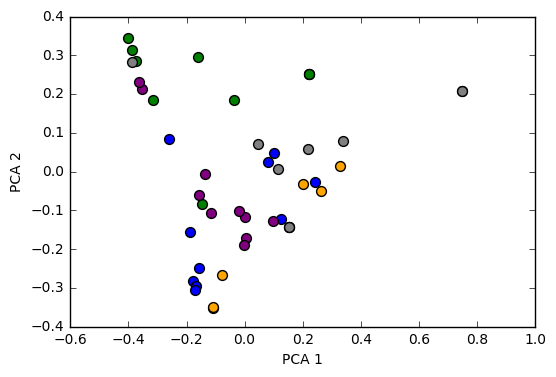

In [9]:
All_red = pcaExp.transform(dataAll[:, 2:])
Species = np.concatenate((Obt, Dil, Str, Cil, Hur))
col = ['blue',  'orange','green', 'gray', 'purple']
i=0
for types in set(Species):
    plt.scatter(All_red[Species==types, 0].flatten(),
            All_red[Species==types, 1].flatten(),
            c=col[i], s=50)
    i+=1
    #plt.legend(set(Species2))
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    #plt.xlim(-0.05*1e8, 0.15*1e8)
    #plt.ylim(-0.5*1e7, 0.2*1e7)

In [10]:
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
dataAll.shape

(46, 56)

In [28]:
similarities = euclidean_distances(dataAll[:, 2:])

stress= np.zeros(10)
for i in range(10):
    mds = manifold.MDS(n_components=i+1, max_iter=3000, eps=1e-9, 
                   dissimilarity="precomputed", n_jobs=1)
    pos = mds.fit(similarities).embedding_
    nmds = manifold.MDS(n_components=i+1, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", n_jobs=1)
    npos = nmds.fit_transform(similarities, init=pos)
    stress[i] = nmds.stress_

/Users/ryokubo/anaconda/lib/python3.5/site-packages/sklearn/manifold/mds.py:238: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 4
  % n_init)


array([ 57.92514776,  11.21236377,   4.42856393,   2.33136489,
         1.37167854,   0.81675972,   0.53235751,   0.36896811,
         0.24466391,   0.1527285 ])

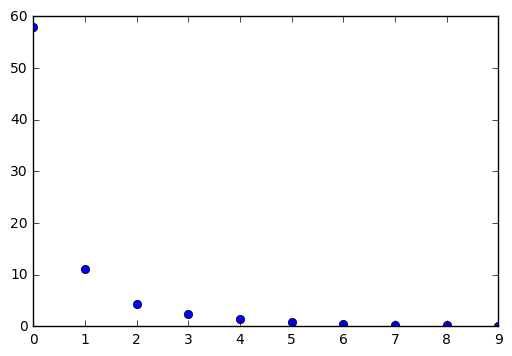

In [32]:
stress
plt.plot(range(10), stress, 'o')
#plt.ylim(-0.5, 5)
#plt.xlim(-0.5, 4.5)
#plt.xaxis([1, 2, 3, 4, 5])
stress

In [35]:
similarities = euclidean_distances(dataAll[:, 2:])


mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_
nmds = manifold.MDS(n_components=3, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", n_jobs=1)
npos = nmds.fit_transform(similarities, init=pos)
   
#stress[4] = nmds.stress_

/Users/ryokubo/anaconda/lib/python3.5/site-packages/sklearn/manifold/mds.py:238: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 4
  % n_init)


9.2944291253291649

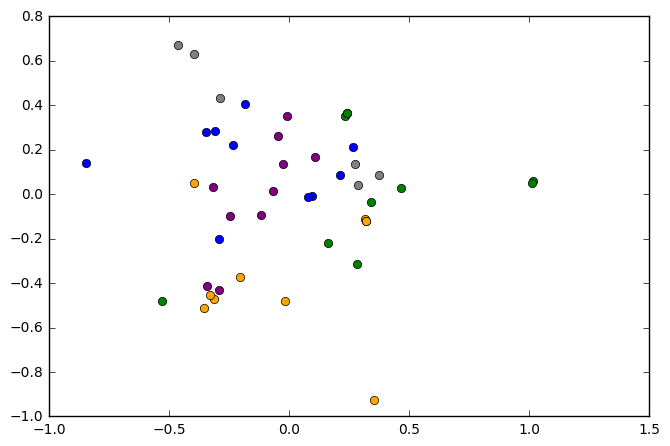

In [36]:
# Rescale the data
#pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
#npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA()
X_true = clf.fit_transform(dataAll[:, 2:])

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 10
Cil = np.repeat(3, data_Cil.shape[0])
Dil = np.repeat(1, data_Dil.shape[0])
Str = np.repeat(2, data_Stri.shape[0])
Obt = np.repeat(0, data_Obt.shape[0])
Hur = np.repeat(4, data_Hur.shape[0])

Species = np.concatenate((Obt, Dil, Str, Cil, Hur))

#plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            #label='True Position')
#plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
#plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
#plt.legend(scatterpoints=1, loc='best', shadow=False)
col = ['blue',  'orange','green', 'gray', 'purple']
#i=0
#for types in set(Species):
   # plt.scatter(npos[Species==types, 0],
  #          npos[Species==types, 1],s=s, lw= 0, c=col[i])
 #   i+=1
#
#plt.legend(set(Species), loc='best', shadow='TRUE')


i=0
for types in set(Species):
    plt.plot(npos[Species==types, 0],
            npos[Species==types, 1], 'o', c=col[i])
    #plt.xlim(-0.13, -0.11)
    #plt.ylim(-0.02,0)
    i+=1

#plt.legend(set(Species), loc='best', shadow='TRUE')
#npos
nmds.stress_

In [10]:
def test_train_id(N, test_frac):
    Samples = np.arange(0,N)
    Fraction = test_frac*N
    test = np.random.choice(range(0,N), round(Fraction))
    train = np.delete(Samples, test)
    return test, train   

In [11]:
def cross_val_class_accuracy(model, X, y, r, test_frac, reps):
    Accuracy = np.zeros(reps)
    for i in range(reps):
        test, train = test_train_id(46, test_frac)
        DataTest = X[test, :]
        DataTrain = X[train, :]
        pcaExp_train = PCA(r)
        pcaExp_train.fit(DataTrain)
        Train_red = pcaExp_train.transform(DataTrain)
        Test_red = pcaExp_train.transform(DataTest)
        mymodel = model
        model.fit(Train_red, y[train])
        Predict = model.predict(Test_red)
        Accuracy[i] = np.mean(Predict == y[test])
    cv_acc = np.mean(Accuracy)
    sd_acc = np.std(Accuracy)
    return cv_acc, sd_acc

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import tree

KNN2 = cross_val_class_accuracy(KNeighborsClassifier(5), dataAll[:, 2:], Species, 10, 0.2, 200)
LDA5 = cross_val_class_accuracy(LinearDiscriminantAnalysis(), dataAll[:, 2:], Species, 10, 0.2, 200)
LDA20 = cross_val_class_accuracy(LinearDiscriminantAnalysis(), dataAll[:, 2:], Species, 20, 0.2, 200)
SVM20 = cross_val_class_accuracy(SVC(kernel='linear'), dataAll[:, 2:], Species, 10, 0.2, 200)
DT20 = cross_val_class_accuracy(tree.DecisionTreeClassifier(), dataAll[:, 2:], Species, 10, 0.2, 200)    

/Users/ryokubo/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


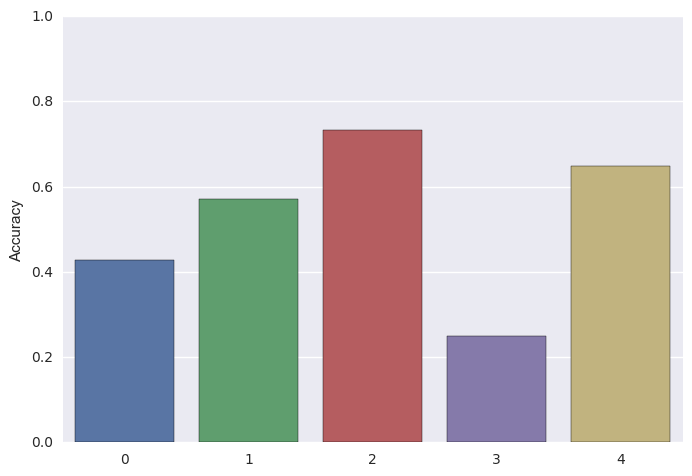

In [15]:
import seaborn as sns 
sns.barplot(np.arange(0,5), [KNN2[0], LDA5[0], LDA20[0], SVM20[0], DT20[0]])
plt.ylim(0,1)
plt.ylabel('Accuracy')